In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib notebook

In [126]:
radii = [1.0, 0.5] # Outer is always first
velocities = [1.0, 2.0]

In [150]:
def draw_earth(radii):
    colors = ['y','b','r','g']
    '''
    x0 = np.linspace(-1,1,500)
    for r in radii:
        y = np.sqrt(r*r - x0*x0)
        plt.plot(x0,y,'k-')
        plt.plot(x0,-y,'k-')
        plt.xlim(-1.2,1.2)
        plt.ylim(-1.2,1.2)
    '''
    for i,r in enumerate(radii):
        circle = plt.Circle((0, 0), radius=r,fc=colors[i],alpha=0.3)
        plt.gca().add_patch(circle)
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)


<IPython.core.display.Javascript object>


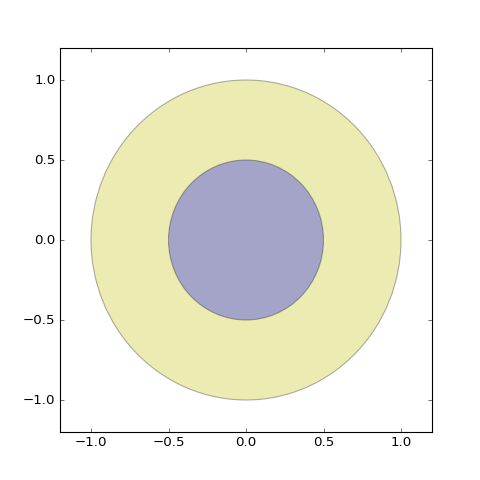

In [151]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
x = draw_earth(radii)

In [106]:
def normal(r,x,y):
    return r

def snells(theta0,v0,v1):
    sin_theta1 = np.sin(theta0)*(v1/v0)
    theta1 = np.arcsin(sin_theta1)
    return theta1

def mag(x,y):
    r = np.sqrt(x*x + y*y)
    return r

def rel_angle(x0,y0, x1,y1):
    mag0 = mag(x0,y0)
    mag1 = mag(x1,y1)
    
    cos_theta = (x0*x1 + y0*y1)/(mag0*mag1)
    
    theta = np.arccos(cos_theta)
    return theta

In [8]:
rel_angle(1,1, 0,1)

0.78539816339744839

In [107]:
ray = [np.linspace(-1,1,1000),None]

In [108]:
angle = np.deg2rad(20.0)
intercept = -1.0
slope = np.tan(np.pi/2. - angle)
#ray[1] = np.tan(np.pi/2 - angle)*ray[0]
ray[1] = intercept + slope*ray[0]

In [109]:
plt.plot(ray[0],ray[1])

In [110]:
index = ray[0]*ray[0] + ray[1]*ray[1] <= 1.0*1.0

<IPython.core.display.Javascript object>


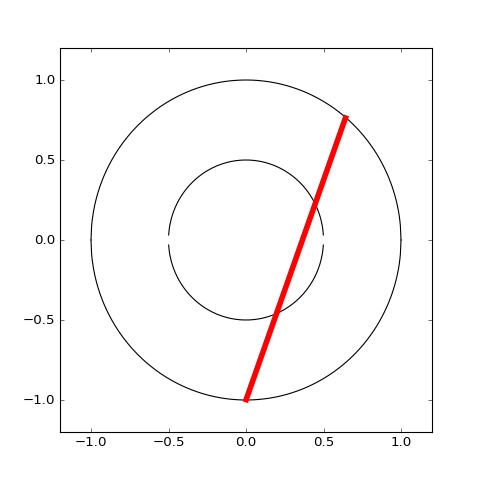

/home/bellis/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


In [111]:
fig = plt.figure(figsize=(6,6))
draw_earth()
plt.plot(ray[0][index],ray[1][index],'r-',linewidth=5)

In [112]:
def linear(m,b,x):
    y = b + m*x
    return y

def radial_dist(x,y):
    r2 = x*x + y*y
    r = np.sqrt(r2)
    return r

def vector_representation(x0,y0, x1,y1):
    theta = np.arctan2(y1-y0,x1-x0)
    #vec_mag = mag(x1-x0,y1-y0)
    vec_mag = 1.0
    x = vec_mag*np.cos(theta)
    y = vec_mag*np.sin(theta)
    return x,y

def new_y(x0,y0,x1,theta):
    y = (x1-x0)*np.tan(theta) + y0
    return y

In [18]:
intercept = -1.0
#ray[1] = np.tan(np.pi/2 - angle)*ray[0]
#ray[1] = intercept + slope*ray[0]

angle = np.pi/2. - np.deg2rad(5.0)
slope = np.tan(angle)
print slope

in_earth = True
ray = [[0],[-1]]
i = 0
step = 0.001
first_in = True
first_out = True
was_in_core = False
while in_earth:
    x0 = ray[0][i]
    y0 = ray[1][i]
    x = x0 + step
    #y = linear(slope,intercept,x)
    y = new_y(x0,y0,x,angle)
    ray[0].append(x)
    ray[1].append(y)

    if radial_dist(x,y)>1.0:
        in_earth = False

    #print was_in_core
    if radial_dist(x,y)<radii[1]:
        was_in_core = True
        if first_in==True:
            # Calc angle
            vx,vy = vector_representation(x,y,ray[0][i],ray[1][i])
            print "here"
            print vx,vy
            t0 = rel_angle(vx,vy,x,y)
            print t0
            
            t1 = snells(t0,velocities[0],velocities[1])
            norm_theta = rel_angle(0.,0.,x,y)
            print t1
            angle = t1 #+ norm_theta
            print angle
        
            first_in = False
                
    if radial_dist(x,y)>0.5 and was_in_core:
        if first_out:
            vx,vy = vector_representation(ray[0][i],ray[1][i],x,y)
            print "there"
            print vx,vy
            t0 = rel_angle(x,y,vx,vy)
            print t0
            
            t1 = snells(t0,velocities[1],velocities[0])
            print t1
            angle = t1
        
            first_out = False       
        
    i += 1

#print ray

11.4300523028
here
-0.0871557427477 -0.996194698092
0.175553704859
0.175553704859
0.175553704859
there
0.984629983435 0.174653358745
1.4625834991
1.4625834991


/home/bellis/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in double_scalars


<IPython.core.display.Javascript object>


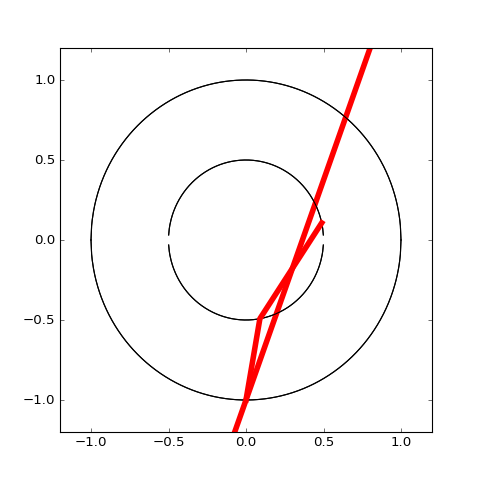

/home/bellis/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


In [113]:
fig = plt.figure(figsize=(6,6))
draw_earth()
plt.plot(ray[0],ray[1],'r-',linewidth=5)

In [32]:
def sgn(x):
    if x<0:
        return -1
    else:
        return +1 

def intersection(x1,y1, x2,y2, r):
    dx = x2-x1
    dy = y2-y1
    dr = mag(dx,dy)
    D = x1*y2 - x2*y1
    
    pts = []
    radical = r**2 * dr**2 - D**2 
    if radical<0:
        return None
    else:
        x = (D*dy + sgn(dy)*dx*np.sqrt(radical))/dr**2
        y = (-D*dx + np.abs(dy)*np.sqrt(radical))/dr**2
        pts.append(np.array([x,y]))
        if radical==0:
            return pts
        else:
            x = (D*dy + sgn(dy)*dx*-1*np.sqrt(radical))/dr**2
            y = (-D*dx + np.abs(dy)*-1*np.sqrt(radical))/dr**2
            pts.append(np.array([x,y]))
            return pts

In [114]:
intersection(0.0,-1.0, 0.0, -0.9, 0.5)

[array([ 0. ,  0.5]), array([ 0. , -0.5])]

In [154]:
intercept = -1.0
angle = np.pi/2. - np.deg2rad(4.0)
slope = np.tan(angle)
print slope
x0 = 0.0
y0 = intercept
x = 1.0
y = new_y(x0,y0,x,angle)

pts = intersection(x0,y0,x,y,radii[1])
if pts is not None:
    print pts
    closest = None
    if len(pts)==1:
        closest = pts[0]
    if len(pts)>1:
        d0 = mag(x0-pts[0][0],y0-pts[0][1])
        d1 = mag(x0-pts[1][0],y0-pts[1][1])
        if d0<d1:
            closest = pts[0]
        else:
            closest = pts[1]
            
        print closest
ray = [[x0,closest[0]],[y0,closest[1]]]


# Next layer
vx,vy = vector_representation(ray[0][1],ray[1][1],x0,y0)
print "here"
print vx,vy
t0 = rel_angle(ray[0][1],ray[1][1],vx,vy)
print "t0"
print t0
print np.rad2deg(t0)

t1 = snells(t0,velocities[0],velocities[1])
norm_theta = rel_angle(1.,0.,ray[0][1],ray[1][1])
print "angles"
print velocities
print angle
print norm_theta
print t0
print t1
print np.rad2deg(t1)
print norm_theta
#angle = np.pi/2. - (t1 + norm_theta)
#angle = np.pi/2. - t0
angle -= (t1-t0)
print angle
print np.pi/2. - np.deg2rad(5.0)
print np.pi/2. - t1

x0 = closest[0]
y0 = closest[1]
x = x0 + 1.0
y = new_y(x0,y0,x,angle)

print "pts"
pts = intersection(x0,y0,x,y,radii[1])
if pts is not None:
    print pts
    furthest = None
    if len(pts)==1:
        furthest = pts[0]
    if len(pts)>1:
        d0 = mag(x0-pts[0][0],y0-pts[0][1])
        d1 = mag(x0-pts[1][0],y0-pts[1][1])
        if d0<d1:
            furthest = pts[1]
        else:
            furthest = pts[0]
            
        print furthest
ray[0].append(furthest[0])
ray[1].append(furthest[1])

print ray



14.3006662567
[array([ 0.10412369,  0.48903809]), array([ 0.03504941, -0.49877003])]
[ 0.03504941 -0.49877003]
here
-0.0697564737441 -0.99756405026
t0
0.139969534837
8.0196636066
angles
[1.0, 2.0]
1.50098315672
1.50063996204
0.139969534837
0.282779566407
16.2020756877
1.50063996204
1.35817312515
1.4835298642
1.28801676039
pts
[array([ 0.23769302,  0.43988866]), array([ 0.03504941, -0.49877003])]
[ 0.23769302  0.43988866]
[[0.0, 0.035049414151161952, 0.23769301800919679], [-1.0, -0.4987700257309578, 0.43988865544553385]]


<IPython.core.display.Javascript object>


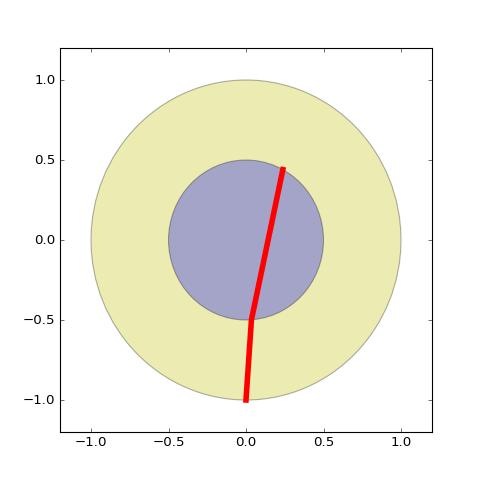

In [155]:
fig = plt.figure(figsize=(6,6))
draw_earth(radii)
plt.plot(ray[0],ray[1],'r-',linewidth=5)